# EXPLORACIÓN DE DATOS

## Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Lectura 


In [2]:
mark = pd.read_csv('BankMarketing.csv', sep=";")
mark.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
mark.dtypes#tipo}
#colunmas categoricas 
#colunmas numericas

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Contar valores perdidos

In [3]:
mark.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
mark.columns# nombre de columnas


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
mark["job"].unique()#valores unicos

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
mark["marital"].unique()#unknown

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [8]:
mark["education"].unique()#unknown

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
mark["default"].unique()#unknown

array(['no', 'unknown', 'yes'], dtype=object)

In [10]:
mark["housing"].unique()#unknown

array(['no', 'yes', 'unknown'], dtype=object)

In [11]:
mark["loan"].unique()#unknown

array(['no', 'yes', 'unknown'], dtype=object)

In [12]:
mark["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [13]:
mark["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

### Imputar con la moda

In [3]:
filtro= mark[mark['marital'] != 'unknown']
moda = filtro['marital'].mode()[0]
#Reemplazar
mark['marital'] = mark['marital'].replace('unknown', moda)
moda

'married'

In [4]:
categorical_columns = mark.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if 'unknown' in mark[column].values:
        # Filtrar los valores 'unknown' en la columna
        filtered_column = mark[mark[column] != 'unknown']
        
        # Encontrar la moda de la columna sin 'unknown'
        moda = filtered_column[column].mode()[0]
        
        # Reemplazar 'unknown' con la moda en la columna
        mark[column] = mark[column].replace('unknown', moda)
print(mark.head())

   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

## Descripciones estadisticas de las variables

In [7]:
mark.describe(include='all')#para variables numericas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10752,25008,13899,41185,22566,34940,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
#variables categoricas
categoria= mark.select_dtypes(include=['object','category']).columns
esta= mark[categoria].describe()
esta

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,25008,13899,41185,22566,34940,26144,13769,8623,35563,36548


## Visualizacion de datos

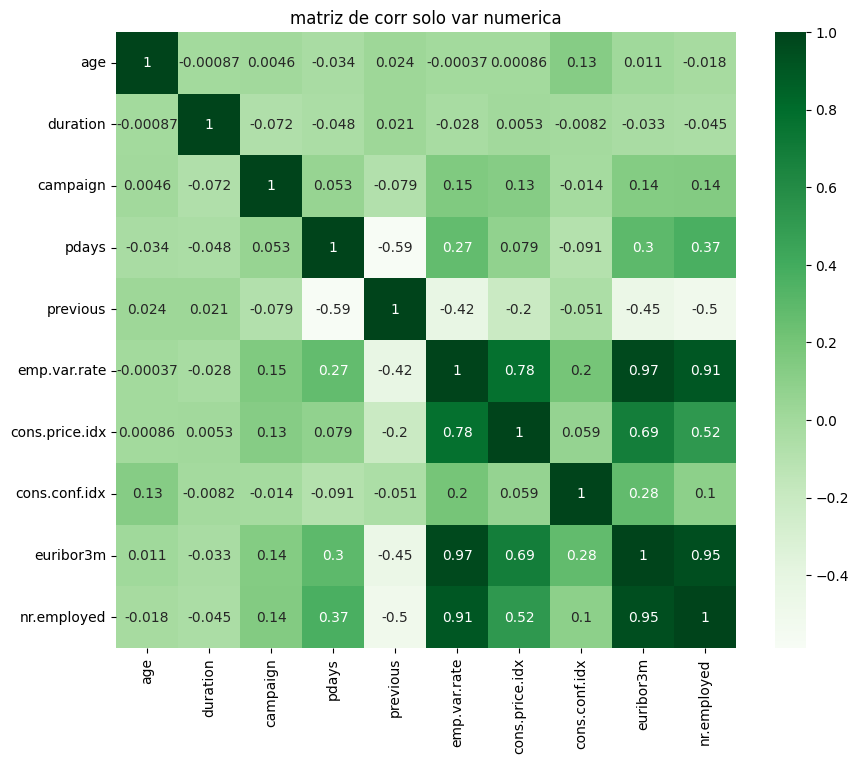

In [9]:
numerica = mark.select_dtypes(include=['int64', 'float64'])
corr1 = numerica.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, cmap='Greens')
plt.title('matriz de corr solo var numerica')
plt.show()

In [ ]:
# 0.91
# 0.95
# 0.97

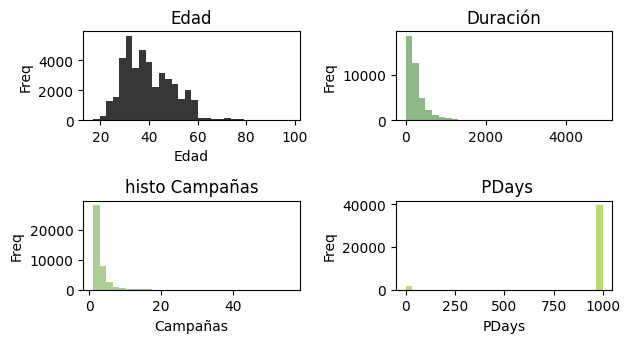

In [19]:
plt.subplot(3, 2, 1)
plt.hist(mark['age'], bins=30, color='#373737')
plt.title('Edad')
plt.xlabel('Edad')
plt.ylabel('Freq')
plt.subplot(3, 2, 2)
plt.hist(mark['duration'], bins=30, color='#8db986')
plt.title('Duración')

plt.ylabel('Freq')
plt.subplot(3, 2, 3)
plt.hist(mark['campaign'], bins=30, color='#acce91')
plt.title('histo Campañas')
plt.xlabel('Campañas')
plt.ylabel('Freq')
plt.subplot(3, 2, 4)
plt.hist(mark['pdays'], bins=30, color='#badb73')
plt.title(' PDays')
plt.xlabel('PDays')
plt.ylabel('Freq')

plt.tight_layout()
plt.show()

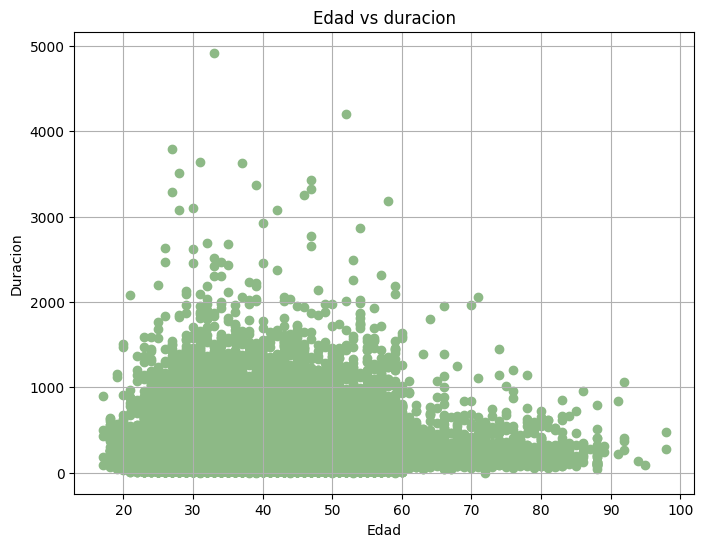

In [20]:
#Dispersion  Relacion entreedad y duracion
# Relacion no lineal

plt.figure(figsize=(8, 6))
plt.scatter(mark['age'], mark['duration'], color='#8db986')
plt.title('Edad vs duracion')
plt.xlabel('Edad')
plt.ylabel('Duracion')
plt.grid(True)
plt.show()

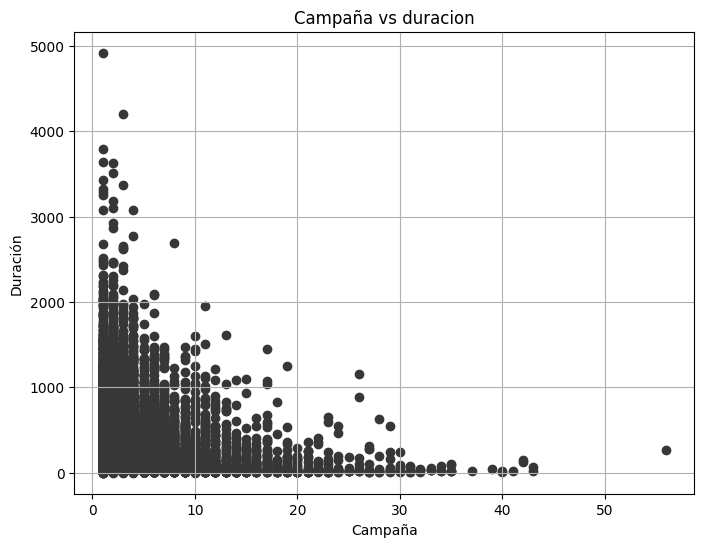

In [22]:
##campaign y duration
# relacion no lineal
plt.figure(figsize=(8, 6))
plt.scatter(mark['campaign'], mark['duration'],color='#373737')
plt.title('Campaña vs duracion')
plt.xlabel('Campaña')
plt.ylabel('Duración')
plt.grid(True)
plt.show()

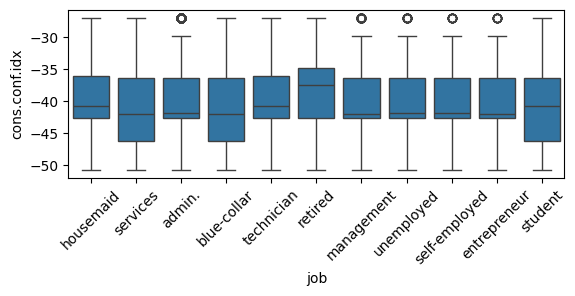

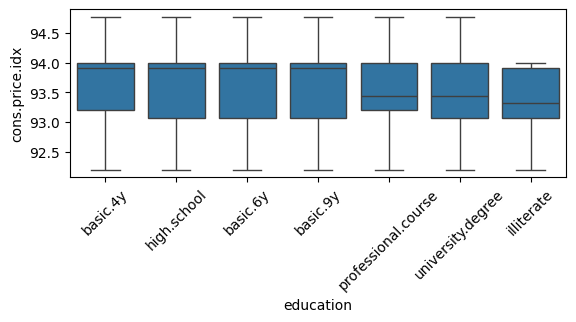

In [24]:
plt.subplot(2, 1, 1)
sns.boxplot(mark, x = 'job', y = 'cons.conf.idx')
plt.xticks(rotation=45)
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(mark, x = 'education', y = 'cons.price.idx')
plt.xticks(rotation=45)
plt.show()

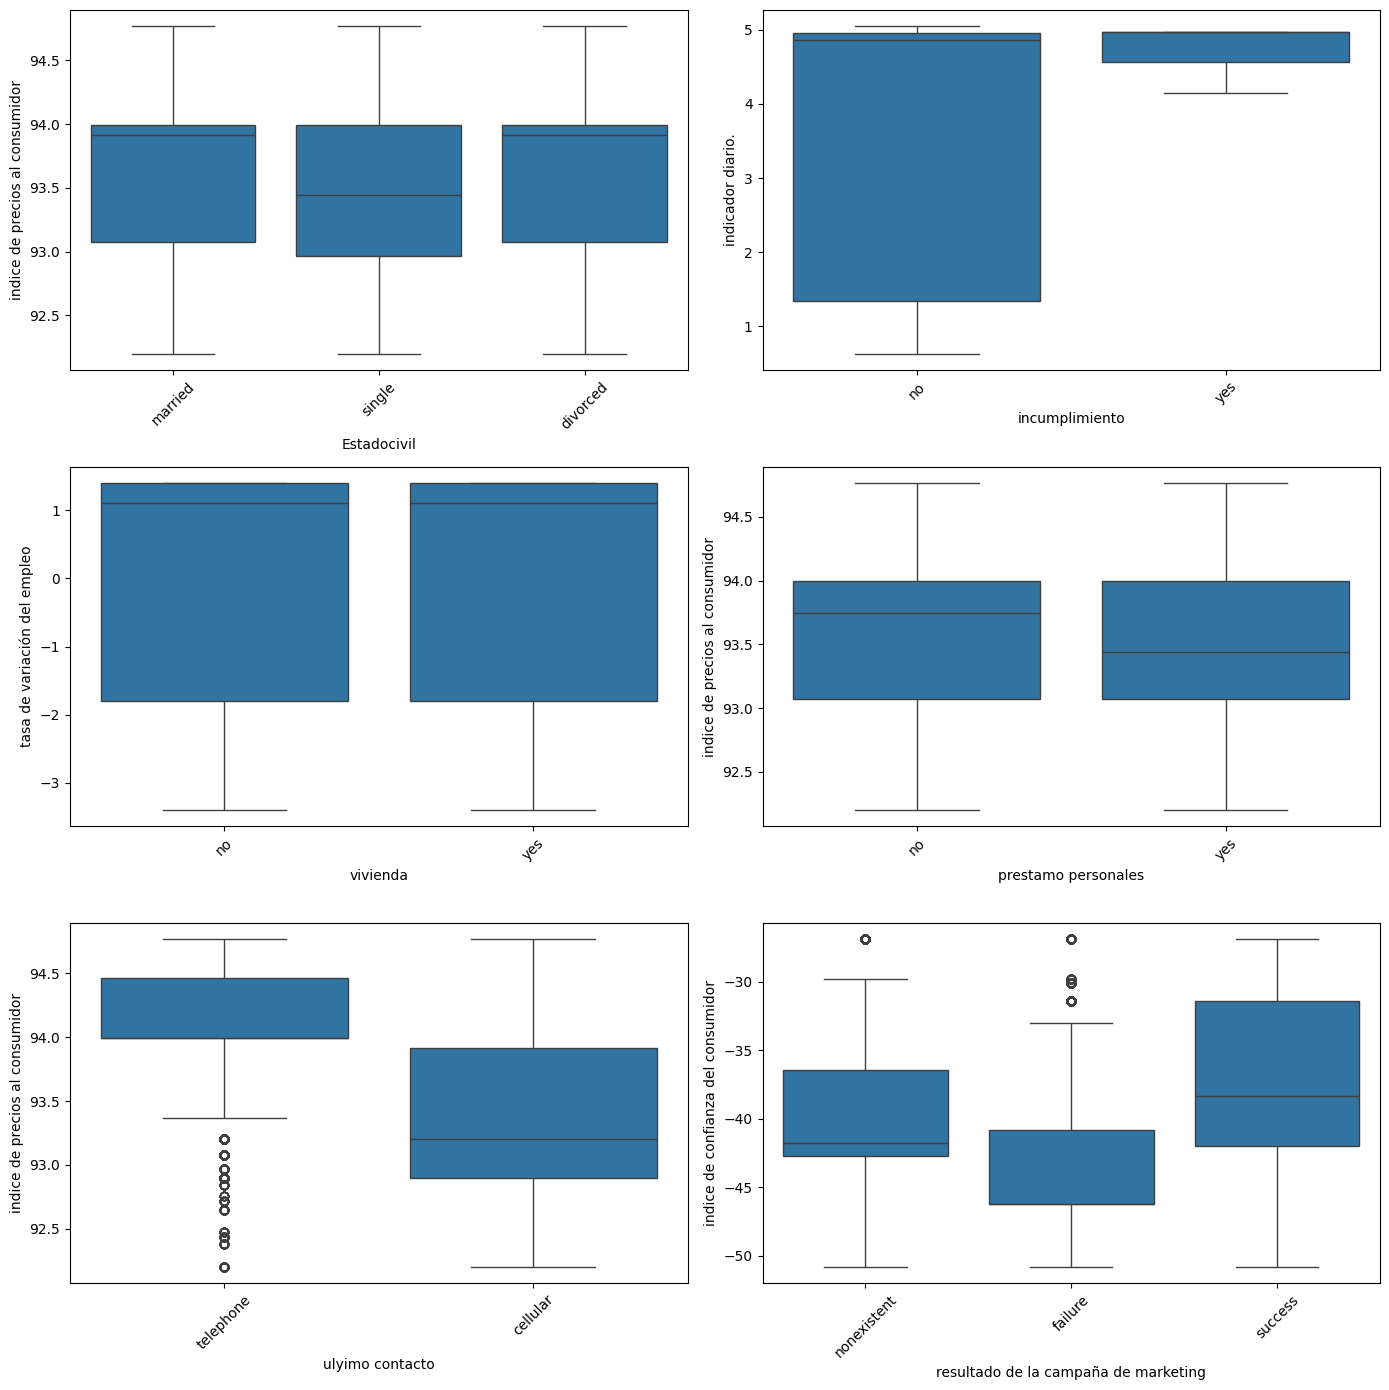

In [25]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 2, 1)
sns.boxplot(data=mark, x='marital', y='cons.price.idx')
plt.xlabel('Estadocivil')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 2)
sns.boxplot(data=mark, x='default', y='euribor3m')
plt.xlabel('incumplimiento')
plt.ylabel('indicador diario.')
plt.xticks(rotation=45)
plt.subplot(3, 2, 3)
sns.boxplot(data=mark, x='housing', y='emp.var.rate')
plt.xlabel('vivienda')
plt.ylabel('tasa de variación del empleo')
plt.xticks(rotation=45)
plt.subplot(3, 2, 4)
sns.boxplot(data=mark, x='loan', y='cons.price.idx')
plt.xlabel('prestamo personales')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 5)
sns.boxplot(data=mark, x='contact', y='cons.price.idx')
plt.xlabel('ulyimo contacto')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 6)
sns.boxplot(data=mark, x='poutcome', y='cons.conf.idx')
plt.xlabel('resultado de la campaña de marketing')
plt.ylabel('indice de confianza del consumidor')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

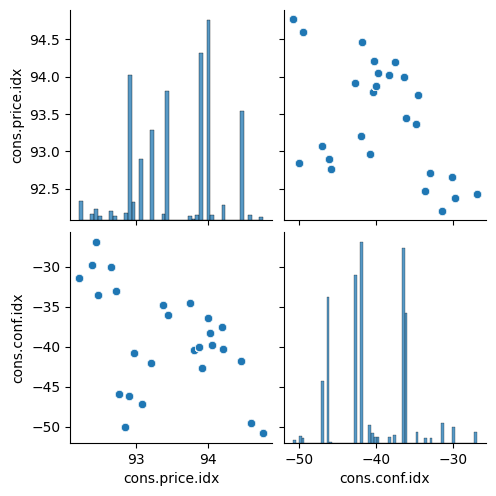

In [26]:
sns.pairplot(mark, vars = ['cons.price.idx','cons.conf.idx'])
plt.show()

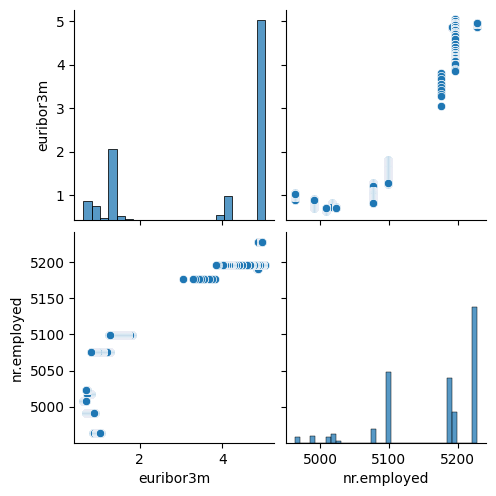

In [27]:
sns.pairplot(mark, vars = ['euribor3m','nr.employed'])
plt.show()

# Preprocesamiento

## Feature Engineering 

In [5]:
# Binarizing numeric variables
mark['B_campaign'] = 0
mark.loc[mark['campaign'] > 1,
'B_campaign'] = 1

In [6]:
# Binarizing numeric variables
mark['B_previous'] = 0
mark.loc[mark['previous'] > 1,
'B_previous'] = 1

In [7]:
# Binning numeric variables
mark['emp_var_rate_binned'] = pd.cut(
    mark['emp.var.rate'],
    bins=[-np.inf, -0.5, 0.5, np.inf],
    labels=['Disminuciónsig', 'Estabilidad', 'Aumentosig']
)


mark['euribor3m_binned'] = pd.cut(
    mark['euribor3m'],
    bins=[-np.inf, 1, 2.5, np.inf],
    labels=['Baja','Media','Alta']
)

mark['nr_employed_binned'] = pd.cut(
    mark['nr.employed'],
    bins=[-np.inf, 5000, 5200, np.inf],
    labels=['Bajo','Medio','Alto']
)

In [9]:
print(mark.head())

   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0         mon  ...          93.994          -36.4      4.857       5191.0  no   
1         mon  ...          93.994          -36.4      4.857       5191.0  no   
2         mon  ...          93.994          -36.4      4.857       5191.0  no   
3         mon  ...          93.994          -36.4      4.857       5191.0  no   
4         mon  ...          93.994          -36.4      4.857       5191.0  no   

   B_campaign  B_previous 

## Preprocesamiento de datos

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
varnumericas = mark.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
mark[varnumericas] = scaler.fit_transform(mark[varnumericas])

In [10]:
varcategoricas = ['default', 'housing', 
                        'loan',"contact",'y']

mark= pd.get_dummies(mark, columns=varcategoricas, drop_first=True)


In [13]:
mark.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,B_campaign,B_previous,emp_var_rate_binned,euribor3m_binned,nr_employed_binned,default_yes,housing_yes,loan_yes,contact_telephone,y_yes
0,1.533034,housemaid,married,basic.4y,may,mon,0.010471,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
1,1.628993,services,married,high.school,may,mon,-0.421501,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
2,-0.290186,services,married,high.school,may,mon,-0.124520,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,1,0,1,0
3,-0.002309,admin.,married,basic.6y,may,mon,-0.413787,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
4,1.533034,services,married,high.school,may,mon,0.187888,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,1,1,0


In [ ]:
##mapeo variables categoricas 

In [11]:
mapeo_job = {
    'housemaid': 1, 
    'services': 2, 
    'admin.': 3, 
    'blue-collar': 4, 
    'technician': 5,
    'retired': 6,
    'management': 7, 
    'unemployed': 8, 
    'self-employed': 9, 
    'entrepreneur': 10,
    'student': 11
}

mark['job'] = mark['job'].replace(mapeo_job)

In [12]:
mapeo_marital = {
'married':1, 
'single':2, 
'divorced':3
}

mark['marital'] = mark['marital'].replace(mapeo_marital)

In [13]:
mapeo_education = {
'basic.4y':1,
'high.school':2,
'basic.6y':3, 
'basic.9y':4,
'professional.course':5, 
'university.degree':6,
'illiterate':7
}

mark['education'] = mark['education'].replace(mapeo_education)

In [14]:
mapeo_poutcome = {
'nonexistent':1, 
'failure':2, 
'success':3}
mark['poutcome'] = mark['poutcome'].replace(mapeo_poutcome)

In [18]:
mark.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,B_campaign,B_previous,emp_var_rate_binned,euribor3m_binned,nr_employed_binned,default_yes,housing_yes,loan_yes,contact_telephone,y_yes
0,1.533034,1,1,1,may,mon,0.010471,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
1,1.628993,2,1,2,may,mon,-0.421501,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
2,-0.290186,2,1,2,may,mon,-0.124520,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,1,0,1,0
3,-0.002309,3,1,3,may,mon,-0.413787,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,0,1,0
4,1.533034,2,1,2,may,mon,0.187888,-0.565922,0.195414,-0.349494,...,-1.155273,-0.162843,Aumentosig,Alta,Medio,0,0,1,1,0


In [ ]:
#Dummy encoding

In [15]:
mark=pd.get_dummies(mark, columns=['emp_var_rate_binned', 'euribor3m_binned', 'nr_employed_binned'],
                      drop_first=True, prefix=['emprate', 'euribor', 'emp'])

In [16]:
mark.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,housing_yes,loan_yes,contact_telephone,y_yes,emprate_Estabilidad,emprate_Aumentosig,euribor_Media,euribor_Alta,emp_Medio,emp_Alto
0,1.533034,1,1,1,may,mon,0.010471,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,1,0,1,1,0
1,1.628993,2,1,2,may,mon,-0.421501,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,1,0,1,1,0
2,-0.290186,2,1,2,may,mon,-0.124520,-0.565922,0.195414,-0.349494,...,1,0,1,0,0,1,0,1,1,0
3,-0.002309,3,1,3,may,mon,-0.413787,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,1,0,1,1,0
4,1.533034,2,1,2,may,mon,0.187888,-0.565922,0.195414,-0.349494,...,0,1,1,0,0,1,0,1,1,0


In [22]:
#variable fecha

In [17]:
from datetime import datetime

In [18]:
fecha_actual = datetime.now()
fecha_actual

datetime.datetime(2024, 7, 25, 10, 0, 56, 28587)

In [17]:
#mark['fecha'] = pd.to_datetime(mark['month'] + ' ' + mark['day_of_week'] + ', 2024', format='%b %a, %Y')
#mark[['month', 'day_of_week', 'fecha']].head()

In [ ]:
#solo una vez
#fecha_actual = datetime.now()
#mark['fecha'] = (fecha_actual - mark['fecha']).dt.days // 365

In [42]:
#solo una vezz
#mark.drop(['month', 'day_of_week'], axis=1, inplace=True)


In [ ]:
# Sinusoidal Encoding

In [19]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_of_week_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

# Aplicar mapeo
mark['month'] = mark['month'].map(month_mapping)
mark['day_of_week'] = mark['day_of_week'].map(day_of_week_mapping)

# Aplicar codificación sinusoidal
mark['month_sin'] = np.sin(2 * np.pi * mark['month'] / 12)
mark['month_cos'] = np.cos(2 * np.pi * mark['month'] / 12)
mark['day_of_week_sin'] = np.sin(2 * np.pi * mark['day_of_week'] / 7)
mark['day_of_week_cos'] = np.cos(2 * np.pi * mark['day_of_week'] / 7)


In [20]:
mark.head(10)

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,emprate_Estabilidad,emprate_Aumentosig,euribor_Media,euribor_Alta,emp_Medio,emp_Alto,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,1.533034,1,1,1,5,1,0.010471,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
1,1.628993,2,1,2,5,1,-0.421501,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
2,-0.290186,2,1,2,5,1,-0.124520,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
3,-0.002309,3,1,3,5,1,-0.413787,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
4,1.533034,2,1,2,5,1,0.187888,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
5,0.477486,2,1,4,5,1,-0.232513,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
6,1.820911,3,1,5,5,1,-0.460069,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
7,0.093650,4,1,6,5,1,-0.159232,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
8,-1.537652,5,2,5,5,1,0.469442,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349
9,-1.441693,2,2,2,5,1,-0.803333,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.62349


In [25]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  float64
 1   job                  41188 non-null  int64  
 2   marital              41188 non-null  int64  
 3   education            41188 non-null  int64  
 4   month                41188 non-null  int64  
 5   day_of_week          41188 non-null  int64  
 6   duration             41188 non-null  float64
 7   campaign             41188 non-null  float64
 8   pdays                41188 non-null  float64
 9   previous             41188 non-null  float64
 10  poutcome             41188 non-null  int64  
 11  emp.var.rate         41188 non-null  float64
 12  cons.price.idx       41188 non-null  float64
 13  cons.conf.idx        41188 non-null  float64
 14  euribor3m            41188 non-null  float64
 15  nr.employed          41188 non-null 

### Correlacion en las variables ya tratadas

In [26]:
mark.corr()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,emprate_Estabilidad,emprate_Aumentosig,euribor_Media,euribor_Alta,emp_Medio,emp_Alto,month_sin,month_cos,day_of_week_sin,day_of_week_cos
age,1.000000,0.030041,-0.116581,-0.091883,0.077265,-0.018486,-0.000866,0.004594,-0.034369,0.024365,...,0.018953,0.011389,-0.102051,0.023501,-0.007055,0.000259,-0.066284,0.082094,0.014081,0.032990
job,0.030041,1.000000,-0.008455,0.177955,0.061798,0.002435,0.010962,-0.017532,-0.048407,0.051108,...,0.062944,-0.094364,0.000862,-0.060826,0.046358,-0.066366,-0.021055,0.093535,-0.006147,0.000312
marital,-0.116581,-0.008455,1.000000,0.056421,-0.002495,-0.004309,-0.000542,0.000403,-0.016699,0.028844,...,0.003055,-0.051483,0.038961,-0.052228,0.003692,-0.017107,0.005288,0.007467,0.005863,-0.002249
education,-0.091883,0.177955,0.056421,1.000000,0.105967,0.010074,-0.014463,-0.001549,-0.032174,0.020878,...,0.048896,-0.038822,-0.027783,-0.011024,-0.032443,0.021469,-0.114433,0.098570,-0.014923,-0.003244
month,0.077265,0.061798,-0.002495,0.105967,1.000000,-0.006959,-0.019302,-0.030635,-0.079556,0.063754,...,0.672991,-0.128231,-0.459342,0.274910,-0.227236,0.174455,-0.811831,0.782826,0.019208,-0.031231
day_of_week,-0.018486,0.002435,-0.004309,0.010074,-0.006959,1.000000,0.010549,0.015098,0.006765,0.004013,...,0.020133,-0.012314,0.003330,-0.000682,0.027488,-0.024517,0.020427,0.010012,-0.934572,-0.613752
duration,-0.000866,0.010962,-0.000542,-0.014463,-0.019302,0.010549,1.000000,-0.071699,-0.047577,0.020640,...,-0.018970,-0.020295,0.012417,-0.032868,0.017778,-0.030635,0.025593,-0.004864,-0.002471,-0.027851
campaign,0.004594,-0.017532,0.000403,-0.001549,-0.030635,0.015098,-0.071699,1.000000,0.052584,-0.079141,...,-0.076457,0.158343,-0.074747,0.119816,-0.148426,0.167451,-0.040260,-0.111208,-0.027001,0.016158
pdays,-0.034369,-0.048407,-0.016699,-0.032174,-0.079556,0.006765,-0.047577,0.052584,1.000000,-0.587514,...,0.045496,0.230878,-0.014444,0.270251,-0.037115,0.157615,0.054792,-0.118940,-0.008342,0.004100
previous,0.024365,0.051108,0.028844,0.020878,0.063754,0.004013,0.020640,-0.079141,-0.587514,1.000000,...,0.016699,-0.412922,0.185177,-0.423647,0.146770,-0.281892,0.024371,0.177024,-0.004383,-0.000080


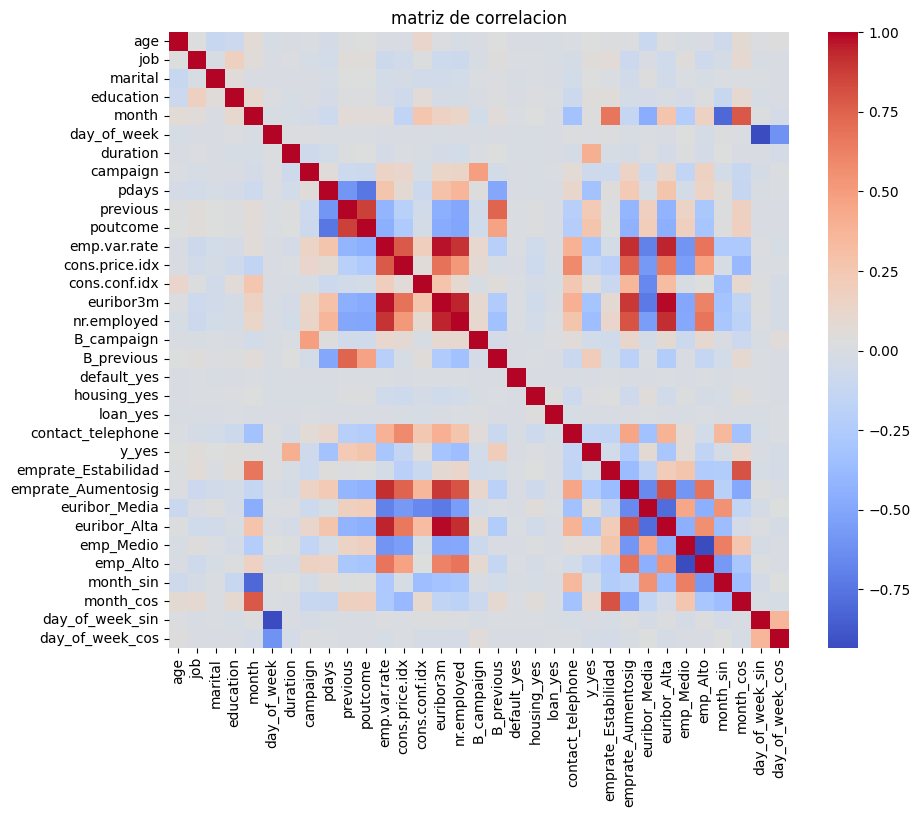

In [27]:
corr = mark.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,cmap='coolwarm')
plt.title('matriz de correlacion')
plt.show()

## Division

# Modelo

In [95]:
#!pip install statsmodels

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [22]:
#Preparar datos
X = mark.drop('y_yes', axis=1) 
y = mark['y_yes']  

############## 

In [41]:
#!pip install imbalanced-learn

In [23]:
#importo la funcion SMOTE
from imblearn.over_sampling import SMOTE

#configuro la funcion SMOTE
os = SMOTE(random_state=0)


In [24]:
# separo la muestra para comprobar la validez del modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
columns = X_train.columns
columns

Index(['age', 'job', 'marital', 'education', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'B_campaign', 'B_previous', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'emprate_Estabilidad', 'emprate_Aumentosig',
       'euribor_Media', 'euribor_Alta', 'emp_Medio', 'emp_Alto', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
lrmodel = LogisticRegression() # Creamos la instancia
lrmodel.fit(X_train,y_train)   # Ajustamos el modelo con los datos de entrenamiento

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)

In [29]:
len (os_data_y)-len(mark)

9970

In [30]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y_yes'])
os_data_y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
51153,1
51154,1
51155,1
51156,1


In [31]:
data_final_mark=mark.columns.values.tolist()
data_final_mark

['age',
 'job',
 'marital',
 'education',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'B_campaign',
 'B_previous',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'y_yes',
 'emprate_Estabilidad',
 'emprate_Aumentosig',
 'euribor_Media',
 'euribor_Alta',
 'emp_Medio',
 'emp_Alto',
 'month_sin',
 'month_cos',
 'day_of_week_sin',
 'day_of_week_cos']

In [32]:

y=['y_yes']  
X=[i for i in data_final_mark if i not in y]
X

['age',
 'job',
 'marital',
 'education',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'B_campaign',
 'B_previous',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'emprate_Estabilidad',
 'emprate_Aumentosig',
 'euribor_Media',
 'euribor_Alta',
 'emp_Medio',
 'emp_Alto',
 'month_sin',
 'month_cos',
 'day_of_week_sin',
 'day_of_week_cos']

In [33]:
from sklearn.feature_selection import RFE

In [34]:
estimator = LogisticRegression(max_iter=5000)

In [35]:
selector = RFE(estimator, n_features_to_select=20)

In [36]:
os_data_y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
51153,1
51154,1
51155,1
51156,1


In [37]:
os_data_y.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [38]:
rfe = selector.fit(os_data_X, os_data_y.values.ravel())
atributos_seleccionados = rfe.support_.tolist()
print(atributos_seleccionados)
print(rfe.ranking_)

[False, False, False, False, True, True, True, False, False, False, True, True, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]
[ 9 13  5 12  1  1  1  8  2  6  1  1  1  4  1  3 10  7 11  1  1  1  1  1
  1  1  1  1  1  1  1  1]


In [39]:
atributos_seleccionados2=[]
for i in range(len(X)):
    if atributos_seleccionados[i] == True:
        atributos_seleccionados2.append(X[i])
atributos_seleccionados2

['month',
 'day_of_week',
 'duration',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'emprate_Estabilidad',
 'emprate_Aumentosig',
 'euribor_Media',
 'euribor_Alta',
 'emp_Medio',
 'emp_Alto',
 'month_sin',
 'month_cos',
 'day_of_week_sin',
 'day_of_week_cos']

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
X=os_data_X[atributos_seleccionados2]
y=os_data_y["y_yes"]

In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 9


C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit              Method:             MLE   
Dependent Variable:    y_yes              Pseudo R-squared:   inf   
Date:                  2024-07-25 10:03   AIC:                inf   
No. Observations:      51158              BIC:                inf   
Df Model:              18                 Log-Likelihood:     -inf  
Df Residuals:          51139              LL-Null:            0.0000
Converged:             1.0000             LLR p-value:        1.0000
No. Iterations:        9.0000             Scale:              1.0000
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
month               -1.1183   0.0292 -38.3328 0.0000 -1.1754 -1.0611
day_of_week         -0.9526   0.0406 -23.4430 0.0000 -1.0322 -0.8729
duration             1.8206   0.0195  93.3467 0.0000  1.7824  1.8588
poutcome             0.2835   0.0276  10.2746 0.0000  0.2294  0.3375
emp.var.rate        -4.1594   0.0988 -42.0905 0.0000 -4.3531 -3.9657
cons.price.idx       1.1764   0.0436  26.9547 0.0000  1.0909  1.2619
euribor3m           -4.4167   0.1588 -27.8088 0.0000 -4.7280 -4.1054
housing_yes         -0.5846   0.0292 -20.0447 0.0000 -0.6418 -0.5274
loan_yes            -1.2356   0.0546 -22.6332 0.0000 -1.3426 -1.1286
contact_telephone   -1.3368   0.0610 -21.9063 0.0000 -1.4564 -1.2172
emprate_Estabilidad  3.1971      nan      nan    nan     nan     nan
emprate_Aumentosig   6.0506      nan      nan    nan     nan     nan
euribor_Media        1.3493   0.0760  17.7646 0.0000  1.2004  1.4981
euribor_Alta         9.2477      nan      nan    nan     nan     nan
emp_Medio           -0.5212   0.1501  -3.4727 0.0005 -0.8154 -0.2270
emp_Alto             0.2616   0.1207   2.1679 0.0302  0.0251  0.4981
month_sin           -2.3213   0.0912 -25.4395 0.0000 -2.5001 -2.1424
month_cos            2.2954   0.0660  34.7946 0.0000  2.1661  2.4247
day_of_week_sin     -1.2817   0.0663 -19.3240 0.0000 -1.4117 -1.1517
day_of_week_cos     -0.9074   0.0415 -21.8723 0.0000 -0.9888 -0.8261
====================================================================

"""

In [43]:
X2=X.drop(['emprate_Estabilidad','emprate_Aumentosig','emprate_Aumentosig','emp_Medio'], 
                         axis  = 1, 
                         inplace = False)

In [44]:
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                          Results: Logit
Model:                 Logit             Method:            MLE   
Dependent Variable:    y_yes             Pseudo R-squared:  inf   
Date:                  2024-07-25 10:06  AIC:               inf   
No. Observations:      51158             BIC:               inf   
Df Model:              16                Log-Likelihood:    -inf  
Df Residuals:          51141             LL-Null:           0.0000
Converged:             1.0000            LLR p-value:       1.0000
No. Iterations:        8.0000            Scale:             1.0000
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
month             -0.9332   0.0267 -34.9233 0.0000 -0.9855 -0.8808
day_of_week       -0.7181   0.0384 -18.7048 0.0000 -0.7933 -0.6429
duration           1.8846   0.0198  95.1162 0.0000  1.8458  1.9234
poutcome           0.

In [46]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.8896924680740161

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[6673  978]
 [ 715 6982]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7651
           1       0.88      0.91      0.89      7697

    accuracy                           0.89     15348
   macro avg       0.89      0.89      0.89     15348
weighted avg       0.89      0.89      0.89     15348



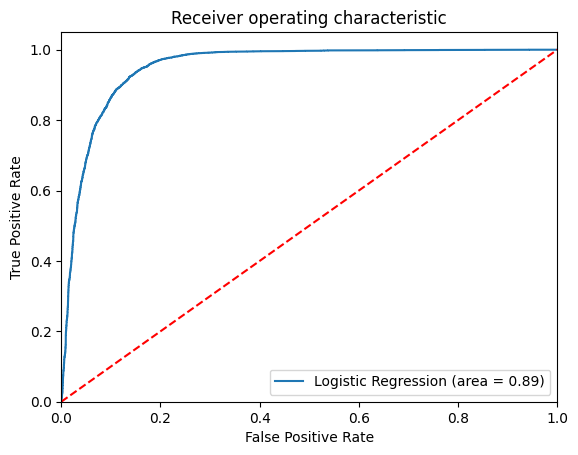

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Comparar

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X

,month,day_of_week,duration,poutcome,emp.var.rate,cons.price.idx,euribor3m,housing_yes,loan_yes,contact_telephone,emprate_Estabilidad,emprate_Aumentosig,euribor_Media,euribor_Alta,emp_Medio,emp_Alto,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,5,4,-0.244083,1,-1.197935,-1.179380,-1.322795,0,1,0,0,0,1,0,1,0,5.000000e-01,-8.660254e-01,-0.433884,-0.900969
1,10,4,-0.170803,1,-2.216433,-1.977538,-1.653164,1,0,0,0,0,0,0,1,0,-8.660254e-01,5.000000e-01,-0.433884,-0.900969
2,5,2,2.139476,1,0.648092,0.722722,0.711883,0,0,1,0,1,0,1,1,0,5.000000e-01,-8.660254e-01,0.974928,-0.222521
3,5,3,-0.799476,1,0.648092,0.722722,0.711883,1,0,1,0,1,0,1,1,0,5.000000e-01,-8.660254e-01,0.433884,-0.900969
4,6,4,0.388447,1,0.839061,1.536429,0.772422,0,0,1,0,1,0,1,0,1,1.224647e-16,-1.000000e+00,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51153,11,4,1.930025,1,-0.115781,-0.649003,0.246636,0,0,0,1,0,0,1,1,0,-5.000000e-01,8.660254e-01,-0.698869,-0.568688
51154,6,2,0.684077,1,-1.898153,-1.058448,-1.360272,0,0,0,0,0,1,0,1,0,1.224647e-16,-1.000000e+00,0.974928,-0.222521
51155,5,5,3.641579,1,0.705470,0.683273,0.733472,0,0,0,0,1,0,1,0,0,1.995458e-01,-8.660254e-01,-0.974928,-0.222521
51156,7,3,0.212443,2,-1.898153,-2.145060,-1.572213,0,0,0,0,0,0,0,1,0,-6.843334e-01,-6.816920e-01,-0.007035,-0.222521


In [66]:
y

0        0
1        0
2        0
3        0
4        0
        ..
51153    1
51154    1
51155    1
51156    1
51157    1
Name: y_yes, Length: 51158, dtype: uint8

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=101)

In [53]:
lrmodel = LogisticRegression(max_iter=3000) 
lrmodel.fit(X_train,y_train)   

LogisticRegression(max_iter=3000)

In [69]:
mark

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,emprate_Estabilidad,emprate_Aumentosig,euribor_Media,euribor_Alta,emp_Medio,emp_Alto,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,1.533034,1,1,1,5,1,0.010471,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.623490
1,1.628993,2,1,2,5,1,-0.421501,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.623490
2,-0.290186,2,1,2,5,1,-0.124520,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.623490
3,-0.002309,3,1,3,5,1,-0.413787,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.623490
4,1.533034,2,1,2,5,1,0.187888,-0.565922,0.195414,-0.349494,...,0,1,0,1,1,0,0.5,-0.866025,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,6,1,5,11,5,0.292025,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,0,-0.5,0.866025,-0.974928,-0.222521
41184,0.573445,4,1,5,11,5,0.481012,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,0,-0.5,0.866025,-0.974928,-0.222521
41185,1.533034,6,1,6,11,5,-0.267225,-0.204909,0.195414,-0.349494,...,0,0,1,0,0,0,-0.5,0.866025,-0.974928,-0.222521
41186,0.381527,5,1,5,11,5,0.708569,-0.565922,0.195414,-0.349494,...,0,0,1,0,0,0,-0.5,0.866025,-0.974928,-0.222521


In [54]:
prediccion=lrmodel.predict(X_test) # Prediccion de los datos 

In [55]:
lrmodel.score(X_train, y_train)
logistic_score = round(lrmodel.score(X_train, y_train)*100,2)
logistic_score

88.9

In [57]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
pred_rf = ranfor.predict(X_test)

ranfor.score(X_train, y_train)

ranfor_score = round(ranfor.score(X_train, y_train)*100,2)
ranfor_score

99.97

In [58]:
df_final = pd.DataFrame({"Models": [ 'Logistic Regression',  'Random Forest'], 
                       "Score": [logistic_score, ranfor_score]})

In [59]:
df_final.sort_values(by= "Score", ascending=False)

,Models,Score
1,Random Forest,99.97
0,Logistic Regression,88.90


In [ ]:
# Evaluaciones de los modelos

In [60]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [61]:
print (classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     12105
           1       0.87      0.91      0.89     11940

    accuracy                           0.89     24045
   macro avg       0.89      0.89      0.89     24045
weighted avg       0.89      0.89      0.89     24045



In [62]:
print (classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12105
           1       0.92      0.94      0.93     11940

    accuracy                           0.93     24045
   macro avg       0.93      0.93      0.93     24045
weighted avg       0.93      0.93      0.93     24045



# PREDICCION

In [168]:
ids = np.arange(len(prediccion))#no hay id
final_report = pd.DataFrame({"Id": ids, 
                             "y" : prediccion})
print(final_report.head())

   Id  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  1


########

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define los modelos
models = {
    'SVM_Linear': make_pipeline(StandardScaler(), SVC(kernel='linear')),
    'SVM_C=4': make_pipeline(StandardScaler(), SVC(C=4)),
    'SVM_Gamma=10': make_pipeline(StandardScaler(), SVC(gamma=10)),
    'SVM_Linear_Custom': make_pipeline(StandardScaler(), SVC(kernel='linear'))
}



from sklearn.metrics import accuracy_score

modelo_entrenado = models['SVM_Linear']
modelo_entrenado.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_entrenado.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
precision


0.8912039925140361

[LightGBM] [Info] Number of positive: 3705, number of negative: 29245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112443 -> initscore=-2.066025
[LightGBM] [Info] Start training from score -2.066025
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      7303
           1       0.47      0.92      0.62       935

    accuracy                           0.87      8238
   macro avg       0.73      0.89      0.77      8238
weighted avg       0.93      0.87      0.89      8238



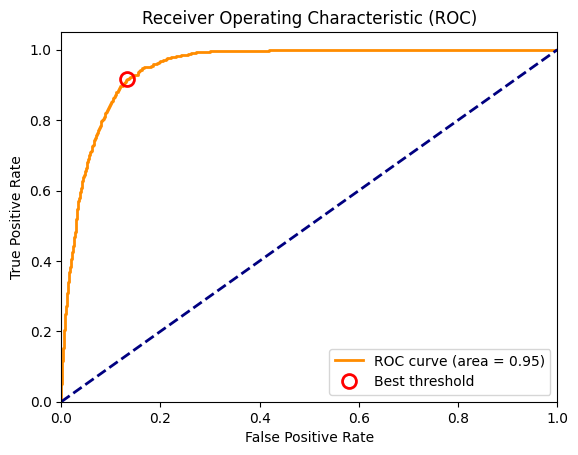

In [64]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


X = mark.drop('y_yes', axis=1)  # Todas las características excepto abandono_6meses
y = mark['y_yes']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros del modelo LightGBM
params = {
    'objective': 'binary',  # Problema de clasificación binaria
    'metric': 'binary_logloss',  # Métrica de evaluación para clasificación binaria
    'boosting_type': 'gbdt',  # Tipo de aumento
    'num_leaves': 31,  # Número máximo de hojas en un árbol
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'feature_fraction': 0.9,  # Fracción de características a considerar en cada árbol
    'bagging_fraction': 0.8,  # Fracción de datos de entrenamiento a considerar en cada iteración
    'bagging_freq': 5,  # Frecuencia de uso de bagging
}

# Entrenar el modelo LightGBM
num_round = 185 # Número de iteraciones (ajusta según sea necesario)
train_data = lgb.Dataset(X_train, label=y_train)
bst = lgb.train(params, train_data, num_round)

# Realizar predicciones en el conjunto de prueba
y_pred = bst.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Encontrar el umbral más cercano al punto (0,1) (esquina superior izquierda)
closest_zero = np.argmin(np.sqrt((1 - tpr) ** 2 + fpr ** 2))

# Mejor umbral
best_threshold = thresholds[closest_zero]

# Redondear las predicciones con el nuevo umbral
y_pred_classes = (y_pred >= best_threshold).astype(int)

# Generar un informe de clasificación con todas las métricas
classification_rep = classification_report(y_test, y_pred_classes)
print("Informe de Clasificación:\n", classification_rep)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr[closest_zero], tpr[closest_zero], 'o', markersize=10, label='Best threshold', fillstyle='none', c='r', mew=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [65]:
# Mejor umbral
best_threshold = thresholds[closest_zero]
print("Mejor umbral:", best_threshold)

Mejor umbral: 0.13993027974166308


In [66]:
from sklearn.metrics import accuracy_score
y_pred = (y_pred >= best_threshold).astype(int)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", precision)

Precisión del modelo: 0.8725418790968682


# Variables más importantes

In [ ]:
# result

In [67]:
impor = bst.feature_importance()
impor_df = pd.DataFrame({'Feature': X.columns, 'Importance': impor})
impor_df = impor_df.sort_values(by='Importance', ascending=False)
impor_df

,Feature,Importance
6,duration,1131
14,euribor3m,829
0,age,746
7,campaign,310
1,job,296
3,education,259
5,day_of_week,198
4,month,195
12,cons.price.idx,191
8,pdays,175


In [ ]:
#mas influyentes
#duration
#euribor3m
#age
#campaign
#job


In [107]:
 y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [109]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y_yes, Length: 8238, dtype: uint8

Confu [[6331  972]
 [  78  857]]
0.8917407760783973


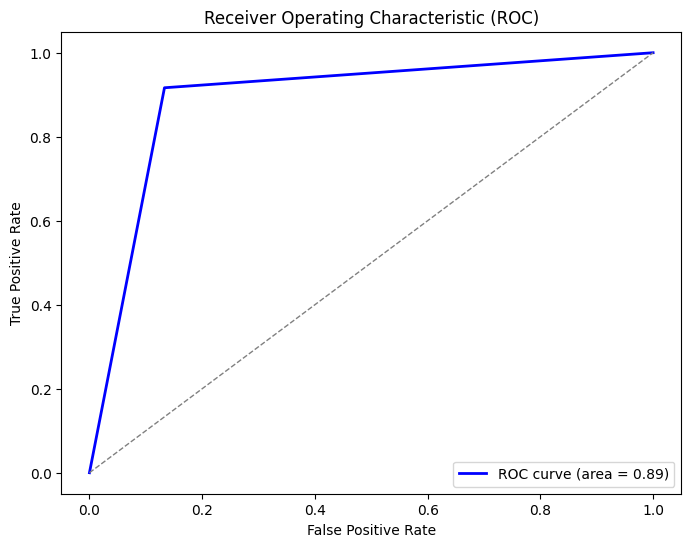

In [68]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Confusionmatrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confu",conf_matrix)

#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

# Plot de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [69]:
# Definición de valores de la matriz de confusión
TN=6331
FP=972
FN=78
TP=857

# Cálculo de métricas
accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)

accuracy, precision, recall, f1_score, specificity


(0.8725418790968682,
 0.46856205576817933,
 0.9165775401069519,
 0.6201157742402317,
 0.8669040120498426)

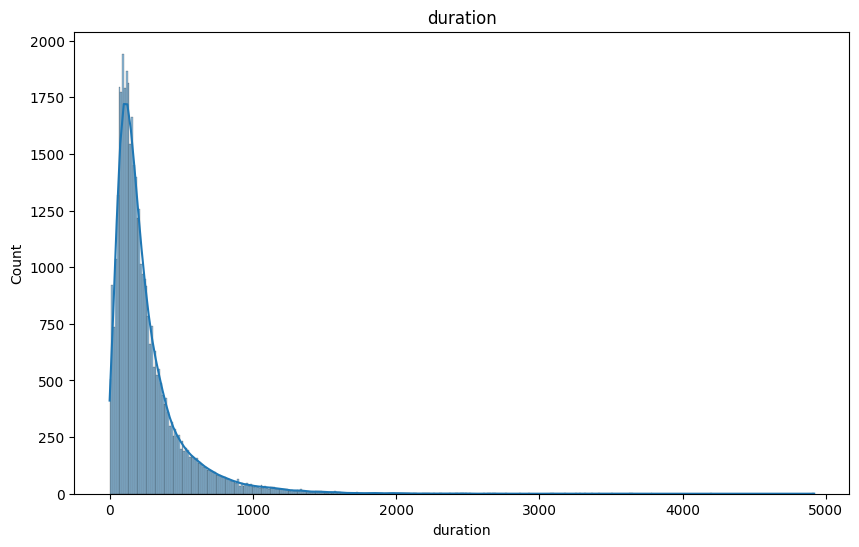

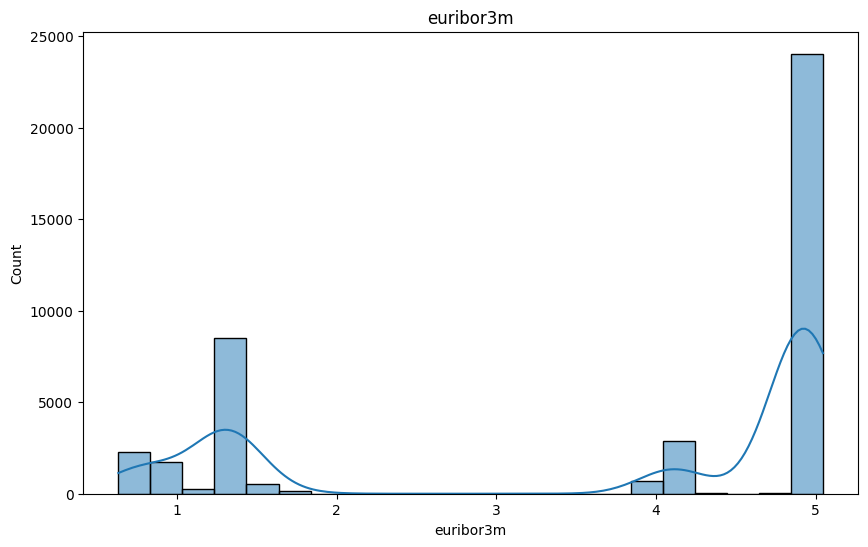

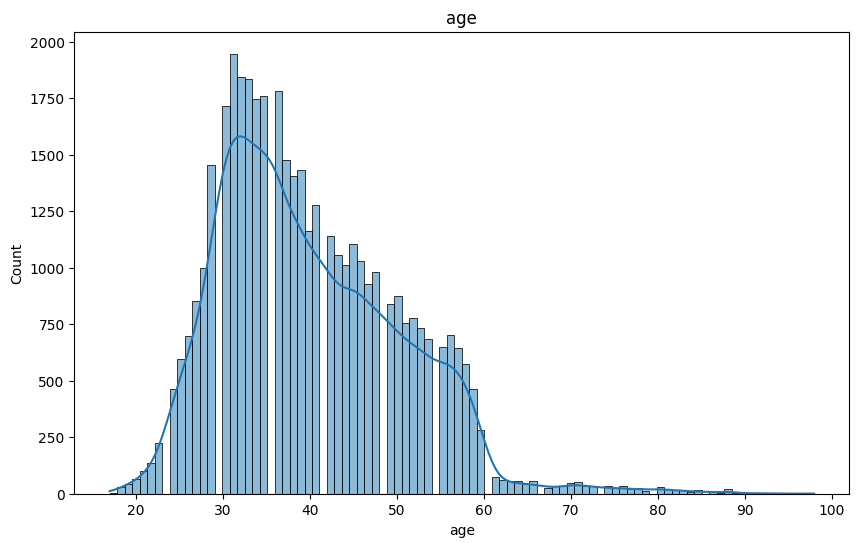

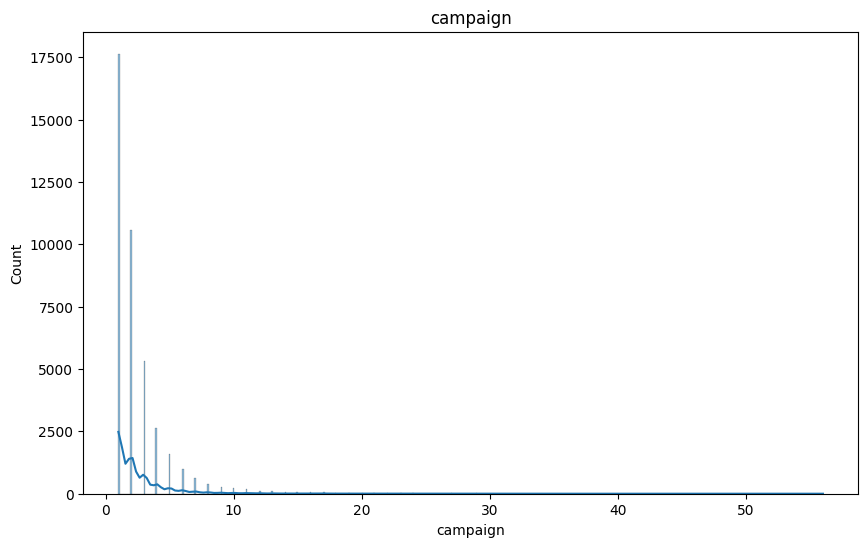

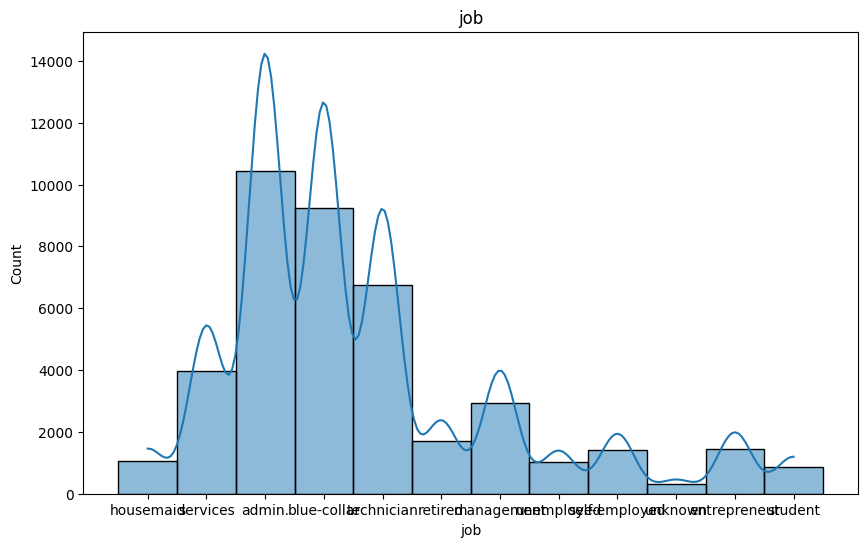

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
mark1 = pd.read_csv('BankMarketing.csv', sep=";")
#distribucion de caracteristicas mas influyentes
features = ['duration', 'euribor3m', 'age', 'campaign', 'job']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(mark1[feature], kde=True)
    plt.title(feature)
    plt.show()

In [58]:
#!pip install shap

C:\Users\Lenovo\anaconda3\envs\smlucky\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


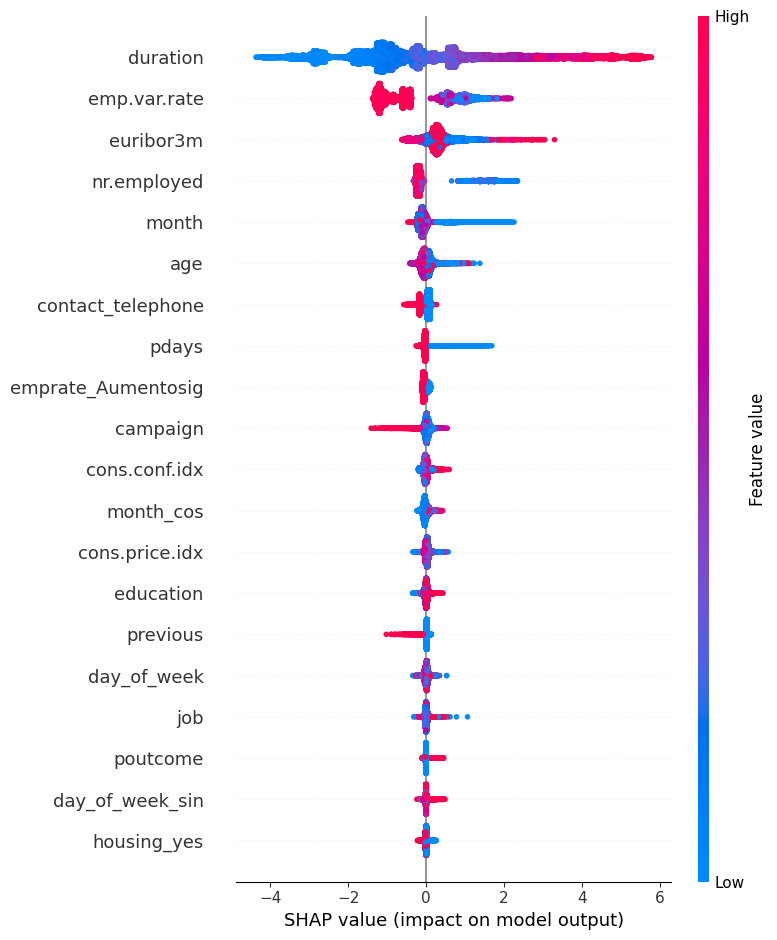

In [70]:
import shap

# Crear el objeto SHAP
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)